# Global Station Papa Flanking Subsurface Mooring A & B (GP03FLMA & GP03FLMB) Dissolved Oxygen (@30m) Data Quality Report

**Evaluation Date**: 08/02/2018

**Evaluator**: Lu Guan

## Review Summary
This report summarizes a data quality review of Dissolved Oxygen (DO hereafter) measurements at 30m of the Global Station Papa Flanking subsurface mooring A & B. I examined the four-years' DO time series from July 2013 to July 2017 with 4 deployments in total, checked CTD time series at 30m as temperature, salinity and pressure data were used for correcting dissolved oxygen concentration, and compared the DO data at Mooring A and B with ~ 40km apart. However, the shipdata at Station Papa is not avaible at the moment via Alfresco for data validation and comparison.   

In general, the following steps are conducted on DO & CTD data at 30m of Flanking Mooring A, and repeated for Flanking Mooring B:
* Check DO & CTD Data Availability
* Check Metadata Availability
* Visualize and Check the entire time series, explore the unusual part
* Focus on changeover between Deployment 3 and Deployment 4
* Focus on the last one and half month of Deployment 3

## 1. Selected instruments included in this report
In this report, I will evaluate the Dissolved Oxygen (DO hereafter) measured at 30m from Flanking subsurface mooring A (lat: 49.97434; lon: -144.23972) & Mooring B (lat: 50.329; long: -144.398) around the Global Station Papa (GP03FLMA), using entire time series collected during July 2013 - July 2017 (Deployment 1-4). In addition, I will evaluate CTD data provided along with the DO data request for reference as the temperature, salinity and pressure from CTD are used for correctng dissolved oxygen concentration.


Instrument | Mooring | Depth |Reference Designator | Method | Stream 
 -- | -- | -- | --
Dissolved Oxygen | A | 30m | [GP03FLMA-RIS01-03-DOSTAD000](http://ooi.visualocean.net/instruments/view/GP03FLMA-RIS01-03-DOSTAD000) | recovered_host | dosta_abcdjm_sio_instrument_recovered
Dissolved Oxygen | B | 30m | [GP03FLMB-RIS01-03-DOSTAD000](http://ooi.visualocean.net/instruments/view/GP03FLMB-RIS01-03-DOSTAD000) | recovered_host | dosta_abcdjm_sio_metadata_recovered
CTD | A | 30m | GP03FLMA-RIM01-02-CTDMOG040 | recovered_host | ctdmo_ghqr_sio_mule_instrument
CTD | B | 30m | GP03FLMB-RIM01-02-CTDMOG060 | recovered_host | ctdmo_ghqr_sio_mule_instrument


The instrument recovered data stream has been used. Graphs of data availability is available at:

http://ooi.visualocean.net/instruments/stats-monthly/GP03FLMA-RIS01-03-DOSTAD000.

http://ooi.visualocean.net/instruments/stats-monthly/GP03FLMB-RIS01-03-DOSTAD000.

Setting up instrument information of Flanking Subsurface Mooring A & B for later use:

In [6]:
# Instrument Information for Flanking Subsurface Mooring A
site = 'GP03FLMA'
node = 'RIS01'
instrument = '03-DOSTAD000'
method = 'recovered_host'
stream = 'dosta_abcdjm_sio_instrument_recovered'

In [7]:
# Instrument Information for Flanking Subsurface Mooring B
site = 'GP03FLMB'
node = 'RIS01'
instrument = '03-DOSTAD000'
method = 'recovered_host'
stream = 'dosta_abcdjm_sio_instrument_recovered'

## 2. Time periods of interest
We will focus on the following time periods for evaluation:
* July 21, 2013 to July 18, 2017 - All of the 4 Deployments (see step #4)
* May 15, 2016 to July 1, 2016 - The last 3 months of Deployment 3 (see step #5)
* June 27, 2016 to July 5, 2016 - The changeover from Deployment 3 to 4 (see step #5)

## 3. Related Metadata
In this section, I will review metadata availability, deployment information, calibration information and existing annotations. Setting up Python environment with libraries, variables and functions needed later in this report:

In [8]:
# Setup the Python libraries of processing environment 
import requests
import datetime
import time
import pandas as pd

In [9]:
# API Information
USERNAME =''
TOKEN= ''

SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'
VOCAB_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
ANNO_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'

In [10]:
# Specify functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None


### 3a. Vocabulary Metadata
First, extract the basic vocabulary information (metadata) from the system to check instrument.

In [11]:
# Instrument Information, setup the API request url
request_url ='/'.join((VOCAB_BASE_URL,site,node,instrument))

# Retrieve vocabulary information for a given instrument from the server
r = requests.get(request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

[{'@class': '.VocabRecord',
  'model': 'Optode 4831',
  'manufacturer': 'Aanderaa',
  'vocabId': 1112,
  'refdes': 'GP03FLMB-RIS01-03-DOSTAD000',
  'instrument': 'Dissolved Oxygen',
  'tocL1': 'Global Station Papa',
  'tocL2': 'Flanking Subsurface Mooring B',
  'tocL3': 'Mooring Riser',
  'mindepth': 30.0,
  'maxdepth': 30.0}]

Recheck site, node, instrument information  

In [13]:
print("%s, %s, %s" % (data[0]['tocL1'],data[0]['tocL2'],data[0]['instrument']))

Global Station Papa, Flanking Subsurface Mooring B, Dissolved Oxygen


In [ ]:
# Instrument Information, create the request URL
data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2013-07-01T00:00:00.000Z',
  'endDT':'2017-01-01T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}


In [ ]:
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()
data
#also can check the url in details
#print(data['allURLs'])
#print(data['allURLs'][0])
#print(data['allURLs'][1])

### 3b. Deployment Information
Next, check information about the deployments for this instrument by extracting all of the deployments available in the system and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each. 

In [14]:
# Setup the API request url
data_request_url = ASSET_BASE_URL + '/events/deployment/query'
params = {
  'beginDT':'2013-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,1073.0,1.0,50.33167,-144.400830,CGINS-DOSTAD-00128,2013-07-24 06:32:00,2014-06-18 00:00:00
1,514.0,2.0,50.33133,-144.397500,CGINS-DOSTAD-00224,2014-06-20 02:00:00,2015-06-07 00:00:00
2,394.0,3.0,50.33033,-144.398330,CGINS-DOSTAD-00391,2015-06-08 21:25:00,2016-07-03 18:35:00
3,1073.0,4.0,50.32925,-144.398000,CGINS-DOSTAD-00128,2016-07-04 23:07:00,2017-07-17 15:02:00
4,1075.0,5.0,50.37768,-144.514867,CGINS-DOSTAD-00127,2017-07-14 22:49:00,None


Repeat this steps for Mooring A & B to get deployment information for Mooring A & B separately as below:

Mooring A Deployment Information:

Asset_id | deployment | latitude | longgitude | Sensor | start | stop 
 -- | -- | -- | --
1073.0 | 1 | 49.97950 | -144.25400 | CGINS-DOSTAD-00129 | 2013-07-21 22:44:00 | 2014-06-15 00:00:00
1076.0 | 2 | 49.97750 | -144.24567 | CGINS-DOSTAD-00127 | 2014-06-17 06:00:00 | 2015-06-05 00:00:00
393.0 | 3 | 49.97667 | -144.24617 | CGINS-DOSTAD-00394 | 2015-06-06 22:40:00 | 2016-06-28 19:10:00
1064.0 | 4 | 49.97434 | -144.23972 | CGINS-DOSTAD-00130 | 2016-07-01 01:07:00 | 2017-07-18 15:13:00
1073.0 | 5 | 50.02288 | -144.36125 | CGINS-DOSTAD-00129 | 2017-07-13 23:00:00 | none

Mooring B Deployment Information:

Asset_id | deployment | latitude | longgitude | Sensor | start | stop 
 -- | -- | -- | --
1074.0 | 1 | 50.33167 | -144.400830 | CGINS-DOSTAD-00128 | 2013-07-24 06:32:00 | 2014-06-18 00:00:00
514.0 | 2 | 50.33133 | -144.397500 | CGINS-DOSTAD-00224 | 2014-06-20 02:00:00 | 2015-06-07 00:00:00
394.0 | 3 | 50.33033 | -144.398330 | CGINS-DOSTAD-00391 | 2015-06-08 21:25:00 | 2016-07-03 18:35:00
1074.0 | 4 | 50.32925 | -144.398000 | CGINS-DOSTAD-00128 | 2016-07-04 23:07:00 | 2017-07-17 15:02:00
1076.0 | 5 | 50.37768 | -144.514867 | CGINS-DOSTAD-00127 | 2017-07-14 22:49:00 | none


There are five deployments from July 2013 to present, the deployment was conducted around June/July every year. 

### 3c. Calibration Information
Pull the calibration information for the full time series (July, 2013 - July 2017) for all deployments to check calibration completion. 

In [15]:
# Setup the API request url
data_request_url = ASSET_BASE_URL + '/asset/cal'
params = {
  'beginDT':'2013-06-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df = df.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
df = df.sort_values(by=['start','name'])
df


,assetUid,name,start,stop,value
4,CGINS-DOSTAD-00128,CC_conc_coef,2013-07-24,None,"[0.0, 1.0]"
20,CGINS-DOSTAD-00128,CC_conc_coef,2013-07-24,None,"[0.0, 1.0]"
2,CGINS-DOSTAD-00128,CC_csv,2013-07-24,None,"[0.00274428, 0.0001138867, 2.229625e-06, 234.4..."
18,CGINS-DOSTAD-00128,CC_csv,2013-07-24,None,"[0.00274428, 0.0001138867, 2.229625e-06, 234.4..."
24,CGINS-DOSTAD-00127,CC_conc_coef,2014-06-17,None,"[0.0, 1.0]"
23,CGINS-DOSTAD-00127,CC_csv,2014-06-17,None,"[0.00271575, 0.000112342, 2.28877e-06, 233.504..."
10,CGINS-DOSTAD-00224,CC_conc_coef,2014-06-20,None,"[0.0, 1.0]"
6,CGINS-DOSTAD-00224,CC_csv,2014-06-20,None,"[0.00314319, 0.000130974, 2.51705e-06, 233.767..."
15,CGINS-DOSTAD-00391,CC_conc_coef,2015-06-08,None,"[0.0, 1.0]"
12,CGINS-DOSTAD-00391,CC_csv,2015-06-08,None,"[0.00279764, 0.000119508, 2.34911e-06, 229.043..."


Repeat this steps for Mooring A & B to get calibration information for Mooring A & B separately as below:

Mooring A Calibration Information:

Asset_Uid | name | start | stop  
 -- | -- | -- | --
CGINS-DOSTAD-00129 | CC_csv | 2013-07-21 | none 
CGINS-DOSTAD-00127 | CC_csv | 2014-06-17 | none 
CGINS-DOSTAD-00130 | CC_csv | 2015-05-09 | none 
CGINS-DOSTAD-00394 | CC_csv | 2015-06-06 | none 
CGINS-DOSTAD-00129 | CC_csv | 2015-06-12 | none
CGINS-DOSTAD-00127 | CC_csv | 2015-12-06 | none
CGINS-DOSTAD-00130 | CC_csv | 2016-07-01 | none
CGINS-DOSTAD-00394 | CC_csv | 2017-03-21 | none


Mooring B Calibration Information:

Asset_Uid | name | start | stop  
 -- | -- | -- | --
CGINS-DOSTAD-00128 | CC_csv | 2013-07-24 | none 
CGINS-DOSTAD-00127 | CC_csv | 2014-06-17 | none 
CGINS-DOSTAD-00224 | CC_csv | 2014-06-20 | none 
CGINS-DOSTAD-00391 | CC_csv | 2015-06-08 | none 
CGINS-DOSTAD-00127 | CC_csv | 2015-12-06 | none
CGINS-DOSTAD-00128 | CC_csv | 2016-07-04 | none
CGINS-DOSTAD-00224 | CC_csv | 2016-07-10 | none
CGINS-DOSTAD-00391 | CC_csv | 2016-03-21 | none

### 3d. Annotations
Last, check any available annotations.

In [16]:
#ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2013,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrument,
}

r = requests.get(ANNO_BASE_URL, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Deployment 5: No data will be available via satellite telemetry. Data will be available when the mooring is recovered.,142.0,None,None,GP03FLMB,2017-07-14 22:49:00,None
1,Deployment 1: Mooring was deployed 5-10m shallower than planned.,154.0,None,None,GP03FLMB,2013-07-24 06:32:00,2014-06-18 00:00:00
2,Deployment 3: Mooring was deployed 10m deeper than planned.,156.0,None,None,GP03FLMB,2015-06-08 21:25:00,2016-07-03 18:35:00
3,Deployment 4: Mooring was deployed 10m deeper than planned.,157.0,None,None,GP03FLMB,2016-07-04 23:07:00,2017-07-17 15:02:00
4,"Deployment 2: Mooring was deployed 10-15m shallower than planned. Upon recovery of platform, biofouling was apparent on shallow CTDs.",155.0,None,None,GP03FLMB,2014-06-20 02:00:00,2015-06-07 00:00:00
5,"Deployment 1: Dissolved oxygen noise was high at various times throughout the deployment, possibly from biofouling.",776.0,RIS01,03-DOSTAD000,GP03FLMB,2013-07-24 06:32:00,2014-06-18 00:00:00
6,"Deployment 2: Dissolved oxygen noise increased, possibly from biofouling.",777.0,RIS01,03-DOSTAD000,GP03FLMB,2014-11-01 00:00:00,2015-06-07 00:00:00


Repeat this steps for Mooring A & B to get annotations for Mooring A & B separately as below:

Mooring A Annotation Information:

annotation | id | node | sensor | site | start | stop  
 -- | -- | -- | --
Deployment 1: Mooring was deployed 10-15m shallower than planned. Telemetered data are not available for this deployment. | 150.0 | none | none | GP03FLMA | 2013-07-21 22:44:00 | 2014-06-15 00:00:00 
Deployment 5: No data will be available via satellite telemetry. Data will be available when the mooring is recovered. | 141.0 | none | none |  GP03FLMA | 2017-07-13 23:00:00 | none
Deployment 3: Mooring was deployed 10-15m deeper than planned. | 152.0 | none | none |  GP03FLMA | 2015-06-06 22:40:00 | 2016-06-28 19:10:00
Deployment 4: Mooring was deployed 10-15m deeper than planned. | 153.0 | none | none |  GP03FLMA | 2016-07-01 01:07:00 | 2017-07-18 15:13:00
Deployment 2: Mooring was deployed 15-20m shallower than planned. Upon recovery of platform, biofouling was apparent on shallow CTDs. | 151.0 | none | none |  GP03FLMA | 2014-06-17 06:00:00 | 2015-06-05 00:00:00
Deployment 1: Dissolved oxygen noise was high at various times throughout the deployment, possibly from biofouling. | 774.0 | RIS01 | 03-DOSTAD000 |  GP03FLMA | 2013-07-21 22:44:00 | 2014-06-15 00:00:00
Deployment 2: Dissolved oxygen noise increased, possibly from biofouling | 775.0 | RIS01 | 03-DOSTAD000 |  GP03FLMA | 2015-01-01 00:00:00 | 2015-06-05 00:00:00


Mooring B Annotation Information:

annotation | id | node | sensor | site | start | stop  
 -- | -- | -- | --
Deployment 5: No data will be available via satellite telemetry. Data will be available when the mooring is recovered.| 142.0 | none | none | GP03FLMB | 2017-07-14 22:49:00 | none 
Deployment 1: Mooring was deployed 5-10m shallower than planned.| 154.0 | none | none |  GP03FLMB | 2013-07-24 06:32:00 | 2014-06-18 00:00:00
Deployment 3: Mooring was deployed 10m deeper than planned. | 156.0 | none | none |  GP03FLMB | 2015-06-08 21:25:00 | 2016-07-03 18:35:00
Deployment 4: Mooring was deployed 10m deeper than planned. | 157.0 | none | none |  GP03FLMB | 2016-07-04 23:07:00 | 2017-07-17 15:02:00
Deployment 2: Mooring was deployed 10-15m shallower than planned. Upon recovery of platform, biofouling was apparent on shallow CTDs. | 155.0 | none | none |  GP03FLMB | 2014-06-20 02:00:00 | 2015-06-07 00:00:00
Deployment 1: Dissolved oxygen noise was high at various times throughout the deployment, possibly from biofouling. | 777.0 | RIS01 | 03-DOSTAD000 |  GP03FLMB | 2013-07-24 06:32:00 | 2014-06-18 00:00:00
Deployment 2: Dissolved oxygen noise increased, possibly from biofouling. | 777.0 | RIS01 | 03-DOSTAD000 |  GP03FLMB | 2014-11-01 00:00:00 | 2015-06-07 00:00:00


## 4. Processing the full dataset
I take a look at the DO & CTD data @30m at Mooring A & B. First, add additional libraries to our Python environment.

### 4a. Extracting & loading DO and CTD data at 30m of Mooring A and Mooring B

In [17]:
import xarray as xr
import requests
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns # package for nice plotting defaults
sns.set()
import requests #to access the OOI API
import datetime
import time
import netCDF4 as nc

Specify THREDDS url (Mooring A), automatically find all the available .nc files

In [18]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html'


In [21]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets # display all datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160701T011501-20161015T100001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMA-RIM01-02-CTDMOG040-recovered_host-ctdmo_ghqr_sio_mule_instrument_20160701T011501-20161015T100001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150606T224501-20160628T190001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-

Separate DO datasets at Mooring A

In [22]:
datasets_DOA = [x for x in datasets if 'CTDMOG' not in x] # exclude CTD files
datasets_DOA # Check DO datasets from mooring A  

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160701T011501-20161015T100001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150606T224501-20160628T190001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0002_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140617T060003-20150604T234501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP

Separate CTD datasets at Mooring A

In [24]:
datasets_CTDA = [x for x in datasets if 'CTDMOG' in x] # exclude CTD files
datasets_CTDA # check CTD datasets from mooring A

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMA-RIM01-02-CTDMOG040-recovered_host-ctdmo_ghqr_sio_mule_instrument_20160701T011501-20161015T100001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMA-RIM01-02-CTDMOG040-recovered_host-ctdmo_ghqr_sio_mule_instrument_20150606T224501-20160627T220001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GP03FLMA-RIM01-02-CTDMOG040-recovered_host-ctdmo_ghqr_sio_mule_instrument_20130721T224501-20140614T220001.nc']

** BUG:  for DO data collected at Mooring A & B, there is no lat long coordinates associated with estimated_oxygen_concentration in Deployment 2, then need process data from Deployment 2 separately from Deployment 1,3 & 4, but visualizing all four deployments in one Figure. **

In [25]:
datasets_DOA2 = datasets_DOA[2]
datasets_DOA2

'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0002_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140617T060003-20150604T234501.nc'

In [26]:
datasets_DOA1 = [x for x in datasets_DOA if 'deployment0002' not in x] #exclude deployment 2 file
datasets_DOA1

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160701T011501-20161015T100001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150606T224501-20160628T190001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T060858-GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GP03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20130721T224501-20140614T234501.nc']

Use open_mfdataset() to load all the files,including deployment 1, 3 & 4, into a single xarray dataset, and use open_dataset() to load single file

In [27]:
ds_DOA1 = xr.open_mfdataset(datasets_DOA1)
ds_DOA1 = ds_DOA1.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_DOA1 = ds_DOA1.chunk({'time': 100}) # Used for optimization
ds_DOA1 = ds_DOA1.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds_DOA1

<xarray.Dataset>
Dimensions:                                     (time: 71274)
Coordinates:
    obs                                         (time) int64 dask.array<shape=(71274,), chunksize=(71274,)>
  * time                                        (time) datetime64[ns] 2013-07-21T22:45:01 ...
    int_ctd_pressure                            (time) float64 dask.array<shape=(71274,), chunksize=(71274,)>
    lat                                         (time) float64 dask.array<shape=(71274,), chunksize=(71274,)>
    lon                                         (time) float64 dask.array<shape=(71274,), chunksize=(71274,)>
Data variables:
    deployment                                  (time) int32 dask.array<shape=(71274,), chunksize=(71274,)>
    id                                          (time) |S64 dask.array<shape=(71274,), chunksize=(71274,)>
    blue_amplitude                              (time) float32 dask.array<shape=(71274,), chunksize=(71274,)>
    blue_phase                     

In [28]:
#load single file data
ds_DOA2 = xr.open_dataset(datasets_DOA2)
ds_DOA2 = ds_DOA2.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_DOA2

<xarray.Dataset>
Dimensions:                                     (time: 33863)
Coordinates:
    obs                                         (time) int32 0 1 2 3 4 5 6 7 ...
  * time                                        (time) datetime64[ns] 2014-06-17T06:00:03 ...
Data variables:
    deployment                                  (time) int32 ...
    id                                          (time) |S64 ...
    blue_amplitude                              (time) float32 ...
    blue_phase                                  (time) float32 ...
    calibrated_phase                            (time) float32 ...
    driver_timestamp                            (time) datetime64[ns] ...
    estimated_oxygen_concentration              (time) float32 ...
    estimated_oxygen_saturation                 (time) float32 ...
    ingestion_timestamp                         (time) datetime64[ns] ...
    internal_timestamp                          (time) datetime64[ns] ...
    optode_temperature         

Then, check comment on the DO measurement for detailed information:



In [29]:
import textwrap
textwrap.wrap(ds_DOA1['dissolved_oxygen'].comment)

['Dissolved Oxygen Concentration from the Stable Response Dissolved',
 'Oxygen Instrument is a measure of the concentration of gaseous oxygen',
 'mixed in seawater. This data product is corrected for salinity,',
 'temperature, and depth.']

** Dissolved Oxygen Concentration from the Stable Response Dissolved Oxygen Instrument is a measure of the concentration of gaseous oxygen mixed in seawater. This data product is corrected for salinity, temperature, and depth. **

** Repeated for Mooring B **

Specify THREDDS url of Mooring B
automatically find all the available .nc files.
Repeat same process as Mooring A for separating datasets

In [30]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html'

In [31]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160704T231501-20161014T144501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMB-RIM01-02-CTDMOG060-recovered_host-ctdmo_ghqr_sio_mule_instrument_20160704T231501-20161014T144501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150608T213001-20160128T200001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-

In [32]:
datasets_DOB = [x for x in datasets if 'CTDMOG' not in x] # exclude CTD files
datasets_DOB 

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160704T231501-20161014T144501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150608T213001-20160128T200001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0002_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140620T020001-20150606T033001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP

In [33]:
datasets_CTDB = [x for x in datasets if 'CTDMOG' in x] # exclude CTD files
datasets_CTDB

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMB-RIM01-02-CTDMOG060-recovered_host-ctdmo_ghqr_sio_mule_instrument_20160704T231501-20161014T144501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMB-RIM01-02-CTDMOG060-recovered_host-ctdmo_ghqr_sio_mule_instrument_20150608T213001-20160702T220001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_host-ctdmo_ghqr_sio_mule_instrument_20130724T220001-20140617T220001.nc']

In [34]:
datasets_DOB2 = datasets_DOB[2]
datasets_DOB2

'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0002_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140620T020001-20150606T033001.nc'

In [35]:
datasets_DOB1 = [x for x in datasets_DOB if 'deployment0002' not in x] #exclude deployment 2 file
datasets_DOB1

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160704T231501-20161014T144501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150608T213001-20160128T200001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/lguan@uvic.ca/20180801T171007-GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GP03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20130724T064501-20140617T234501.nc']

In [36]:
ds_DOB1 = xr.open_mfdataset(datasets_DOB1)
ds_DOB1 = ds_DOB1.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_DOB1 = ds_DOB1.chunk({'time': 100}) # Used for optimization
ds_DOB1 = ds_DOB1.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds_DOB1

<xarray.Dataset>
Dimensions:                                     (time: 48933)
Coordinates:
    obs                                         (time) int64 dask.array<shape=(48933,), chunksize=(48933,)>
  * time                                        (time) datetime64[ns] 2013-07-24T06:45:01 ...
    int_ctd_pressure                            (time) float64 dask.array<shape=(48933,), chunksize=(48933,)>
    lat                                         (time) float64 dask.array<shape=(48933,), chunksize=(48933,)>
    lon                                         (time) float64 dask.array<shape=(48933,), chunksize=(48933,)>
Data variables:
    deployment                                  (time) int32 dask.array<shape=(48933,), chunksize=(48933,)>
    id                                          (time) |S64 dask.array<shape=(48933,), chunksize=(48933,)>
    blue_amplitude                              (time) float32 dask.array<shape=(48933,), chunksize=(48933,)>
    blue_phase                     

In [37]:
#load single file data
ds_DOB2 = xr.open_dataset(datasets_DOB2)
ds_DOB2 = ds_DOB2.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_DOB2

<xarray.Dataset>
Dimensions:                                     (time: 33703)
Coordinates:
    obs                                         (time) int32 0 1 2 3 4 5 6 7 ...
  * time                                        (time) datetime64[ns] 2014-06-20T02:00:01 ...
Data variables:
    deployment                                  (time) int32 ...
    id                                          (time) |S64 ...
    blue_amplitude                              (time) float32 ...
    blue_phase                                  (time) float32 ...
    calibrated_phase                            (time) float32 ...
    driver_timestamp                            (time) datetime64[ns] ...
    estimated_oxygen_concentration              (time) float32 ...
    estimated_oxygen_saturation                 (time) float32 ...
    ingestion_timestamp                         (time) datetime64[ns] ...
    internal_timestamp                          (time) datetime64[ns] ...
    optode_temperature         

### 4b. Visualize DO raw data

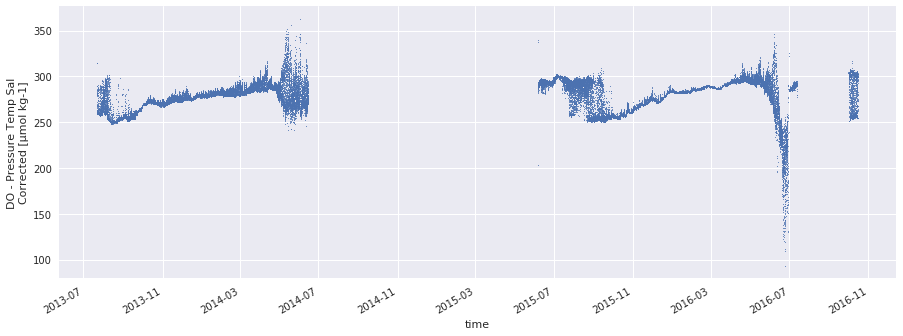

In [38]:
#plot DO(Deployment 1, 3, 4)at Mooring A
fig, (ax) = plt.subplots(figsize=(15,5))
ds_DOA1['dissolved_oxygen'].plot(linestyle='none', marker='.', markersize=2);

Some raw data are missing in deployment 4 of Mooring A.

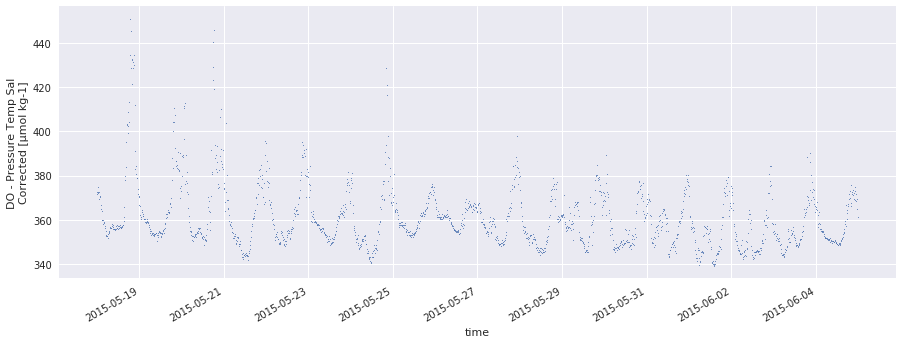

In [39]:
#plot DO(Deployment 2)at Mooring A
fig, (ax) = plt.subplots(figsize=(15,5))
ds_DOA2['dissolved_oxygen'].plot(linestyle='none', marker='.', markersize=2);

Raw data of Mooring A deployment 2 are only partial available (May 2015 - Jun 2015)

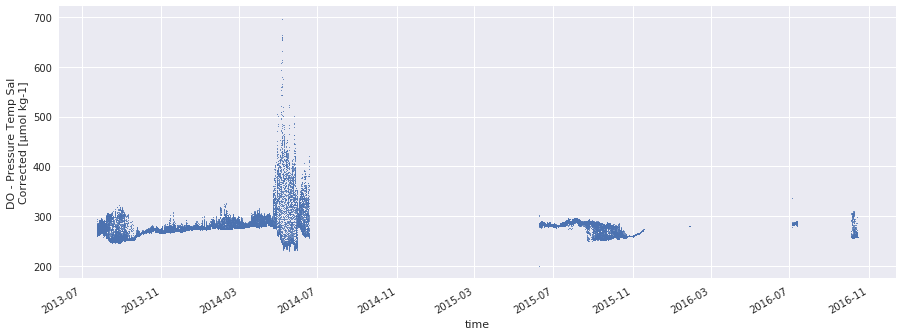

In [40]:
#plot DO(Deployment 1, 3, 4)at Mooring B
fig, (ax) = plt.subplots(figsize=(15,5))
ds_DOB1['dissolved_oxygen'].plot(linestyle='none', marker='.', markersize=2);

Raw data of Mooring B deployment 3 & 4 are partial available

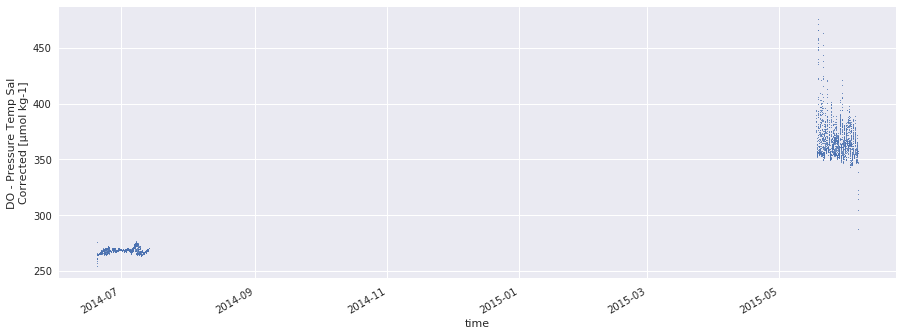

In [41]:
#plot DO(Deployment 2)at Mooring B
fig, (ax) = plt.subplots(figsize=(15,5))
ds_DOB2['dissolved_oxygen'].plot(linestyle='none', marker='.', markersize=2);

Raw data of Mooring B deployment 2 are partial available

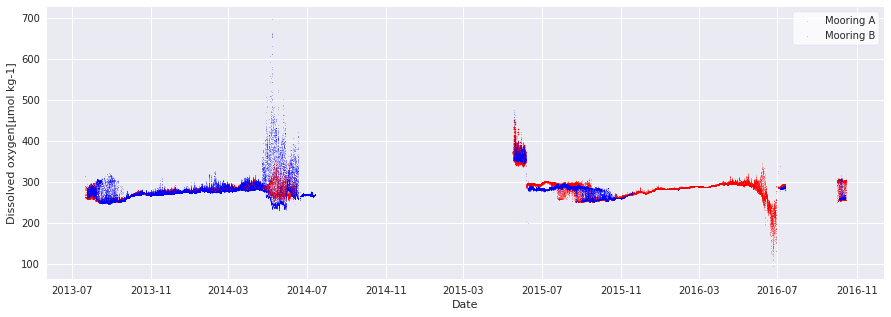

In [42]:
# Plot raw DO data for all four deployments at Mooring A & B together
fig, (ax1)= plt.subplots(1,1, figsize=(15,5))
plt.plot_date(ds_DOA1['time'], ds_DOA1['dissolved_oxygen'], 'r.', label='Mooring A', markersize=.8)
plt.plot_date(ds_DOA2['time'], ds_DOA2['dissolved_oxygen'], 'r.', label='_nolegend_', markersize=3)
plt.plot_date(ds_DOB1['time'], ds_DOB1['dissolved_oxygen'], 'b.', label='Mooring B', markersize=.8)
plt.plot_date(ds_DOB2['time'], ds_DOB2['dissolved_oxygen'], 'b.', label='_nolegend_', markersize=.8)
plt.xlabel('Date')
plt.ylabel('Dissolved oxygen[µmol kg-1]')
#plt.title('Data from %s' % (site));
plt.legend(frameon=1, facecolor='w');

As mentioned in annotation, deployment 1 showed high noise, possiblely due to biofouling. 
There's no CTD data available to correct the DO measurements in deployment 2, however, still partial data are available in deployment 2, showing high noise during the end of the deployment.
There was an abrupt drop in DO during the end of the deployment 3. 

### 4c. Calculate daily DO averages, and visualize the daily DO pattern

In [43]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_DOA1 = ds_DOA1['dissolved_oxygen'].to_dataframe()
    ds_DOA1_a = ds_DOA1.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  0.8s
CPU times: user 3.94 s, sys: 1.24 s, total: 5.17 s
Wall time: 5.87 s


In [44]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_DOA2 = ds_DOA2['dissolved_oxygen'].to_dataframe()
    ds_DOA2_a = ds_DOA2.resample('min').mean() # minute average

CPU times: user 31 ms, sys: 21 ms, total: 52 ms
Wall time: 51.1 ms


In [45]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_DOB1 = ds_DOB1['dissolved_oxygen'].to_dataframe()
    ds_DOB1_a = ds_DOB1.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.5s
CPU times: user 2.59 s, sys: 772 ms, total: 3.36 s
Wall time: 4.06 s


In [46]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_DOB2 = ds_DOB2['dissolved_oxygen'].to_dataframe()
    ds_DOB2_a = ds_DOB2.resample('min').mean() # minute average

CPU times: user 25 ms, sys: 21 ms, total: 46 ms
Wall time: 46.2 ms


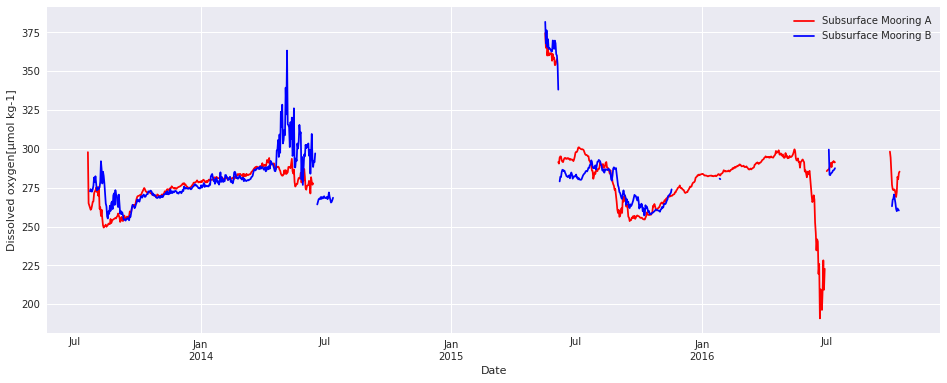

CPU times: user 601 ms, sys: 151 ms, total: 752 ms
Wall time: 553 ms


In [47]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_DOA1_a['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='Subsurface Mooring A')
ds_DOA2_a['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='_nolegend_')
ds_DOB1_a['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='blue', label='Subsurface Mooring B')
ds_DOB2_a['dissolved_oxygen'].resample('D').mean().plot(ax=ax,color='blue', label='_nolegend_')
plt.xlabel('Date')
plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

** The trends in DO measurements at Mooring A & B (although ~ 40km apart) are largely consistent, with larger variations between two sites during July-Sep 2013, May-July 2014 & July-Oct 2015. **

** By the end of deployment 2, the DO values are relatively higher compared to the rest of the DO measurements, seems out of the range of normal variations. In addition, there's no CTD data available for DO correction, these values are unlikely reliable **

** The abrupt drop during the end of Deployment 3 seems unnormal, probably suggesting the optode was not working properly.**

### 4d. Visualize raw T, S & P data from CTD files along with the DO data request, which were used for DO correction

In [48]:
ds_CTDA = xr.open_mfdataset(datasets_CTDA)
ds_CTDA = ds_CTDA.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_CTDA = ds_CTDA.chunk({'time': 100}) # Used for optimization
ds_CTDA = ds_CTDA.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds_CTDA

<xarray.Dataset>
Dimensions:                     (time: 75963)
Coordinates:
    obs                         (time) int64 dask.array<shape=(75963,), chunksize=(75963,)>
  * time                        (time) datetime64[ns] 2013-07-21T22:45:01 ...
Data variables:
    deployment                  (time) int32 dask.array<shape=(75963,), chunksize=(75963,)>
    id                          (time) |S64 dask.array<shape=(75963,), chunksize=(75963,)>
    driver_timestamp            (time) datetime64[ns] dask.array<shape=(75963,), chunksize=(75963,)>
    ingestion_timestamp         (time) datetime64[ns] dask.array<shape=(75963,), chunksize=(75963,)>
    internal_timestamp          (time) datetime64[ns] dask.array<shape=(75963,), chunksize=(75963,)>
    port_timestamp              (time) datetime64[ns] dask.array<shape=(75963,), chunksize=(75963,)>
    preferred_timestamp         (time) object dask.array<shape=(75963,), chunksize=(75963,)>
    provenance                  (time) |S64 dask.array<sha

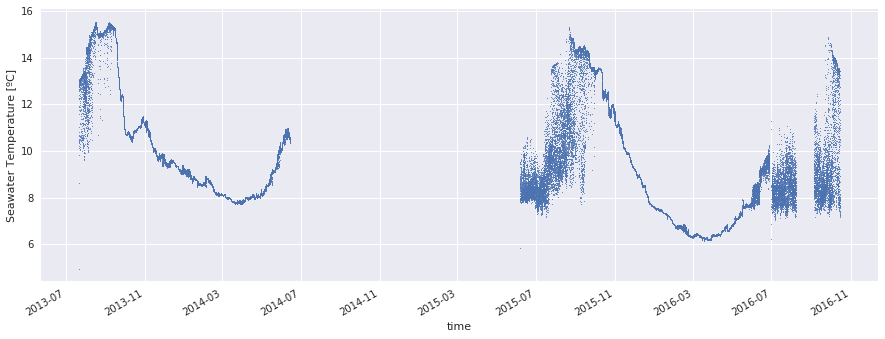

In [49]:
#Check raw Temperature data
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDA['ctdmo_seawater_temperature'].plot(linestyle='none', marker='.', markersize=2);

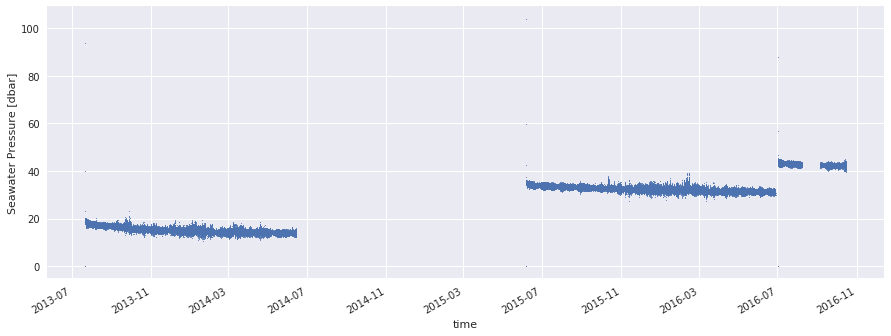

In [50]:
#Check raw Pressure data
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDA['ctdmo_seawater_pressure'].plot(linestyle='none', marker='.', markersize=2);

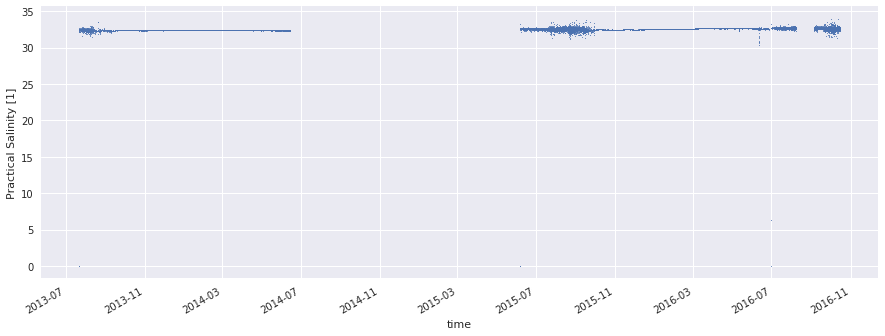

In [51]:
#Check raw Salinity data
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDA['practical_salinity'].plot(linestyle='none', marker='.', markersize=2);

Text(0,0.5,'Salinity')

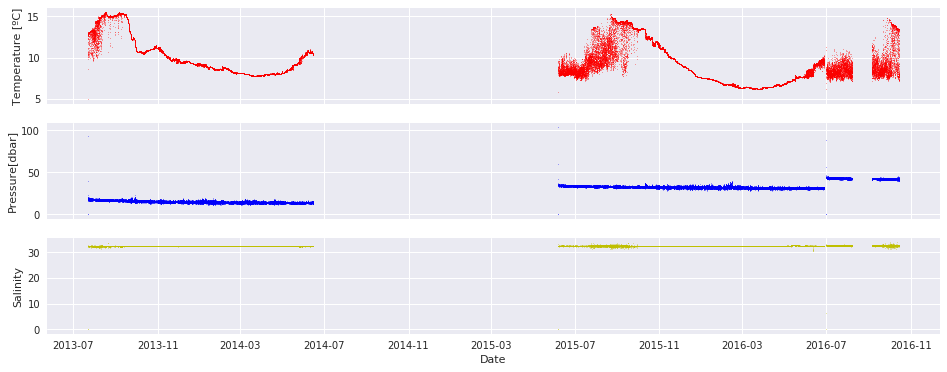

In [53]:
# Plotting rawdata together for visulization
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize=(16,6))
ax1.plot(ds_CTDA['time'], ds_CTDA['ctdmo_seawater_temperature'], 'r.', label='Temperature', markersize=1)
ax2.plot(ds_CTDA['time'], ds_CTDA['ctdmo_seawater_pressure'], 'b.', label='Pressure', markersize=1)
ax3.plot(ds_CTDA['time'], ds_CTDA['practical_salinity'], 'y.', label='Salinity', markersize=1)
ax3.set_xlabel('Date')
ax1.set_ylabel('Temperature [ºC]')
ax2.set_ylabel('Pressure[dbar]')
ax3.set_ylabel('Salinity')
#ax1.legend(frameon=1, facecolor='w');
#ax2.legend(frameon=1, facecolor='w');

### 4e. Calculate and Visualize daily T, S & P

In [54]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDAt = ds_CTDA['ctdmo_seawater_temperature'].to_dataframe()
    ds_CTDAt_a = ds_CTDAt.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.7s
CPU times: user 1.28 s, sys: 388 ms, total: 1.67 s
Wall time: 1.53 s


In [55]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDAp = ds_CTDA['ctdmo_seawater_pressure'].to_dataframe()
    ds_CTDAp_a = ds_CTDAp.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s
CPU times: user 1.6 s, sys: 295 ms, total: 1.89 s
Wall time: 1.71 s


In [56]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDAs = ds_CTDA['practical_salinity'].to_dataframe()
    ds_CTDAs_a = ds_CTDAs.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.8s
CPU times: user 1.42 s, sys: 294 ms, total: 1.71 s
Wall time: 1.65 s


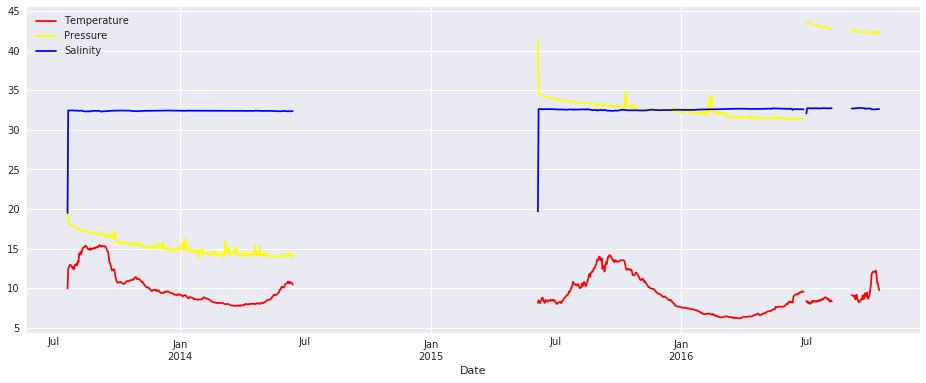

CPU times: user 576 ms, sys: 133 ms, total: 709 ms
Wall time: 533 ms


In [57]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_CTDAt_a['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='Temperature')
ds_CTDAp_a['ctdmo_seawater_pressure'].resample('D').mean().plot(ax=ax, color='yellow', label='Pressure')
ds_CTDAs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', label='Salinity')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

Mooring A: 

CTD data during deployment 2 and part of deployment 4 are missing. For the rest, the changes in T, S & P showed in the figure seems normal, the abrupt changes (vertical lines) in S & P indicate the deployment of CTD.

Then, repeat the same process for CTD data for Mooring B

In [58]:
ds_CTDB = xr.open_mfdataset(datasets_CTDB)
ds_CTDB = ds_CTDB.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds_CTDB = ds_CTDB.chunk({'time': 100}) # Used for optimization
ds_CTDB = ds_CTDB.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
ds_CTDB

<xarray.Dataset>
Dimensions:                     (time: 56508)
Coordinates:
    obs                         (time) int64 dask.array<shape=(56508,), chunksize=(56508,)>
  * time                        (time) datetime64[ns] 2013-07-24T22:00:01 ...
Data variables:
    deployment                  (time) int32 dask.array<shape=(56508,), chunksize=(56508,)>
    id                          (time) |S64 dask.array<shape=(56508,), chunksize=(56508,)>
    driver_timestamp            (time) datetime64[ns] dask.array<shape=(56508,), chunksize=(56508,)>
    ingestion_timestamp         (time) datetime64[ns] dask.array<shape=(56508,), chunksize=(56508,)>
    internal_timestamp          (time) datetime64[ns] dask.array<shape=(56508,), chunksize=(56508,)>
    port_timestamp              (time) datetime64[ns] dask.array<shape=(56508,), chunksize=(56508,)>
    preferred_timestamp         (time) object dask.array<shape=(56508,), chunksize=(56508,)>
    provenance                  (time) |S64 dask.array<sha

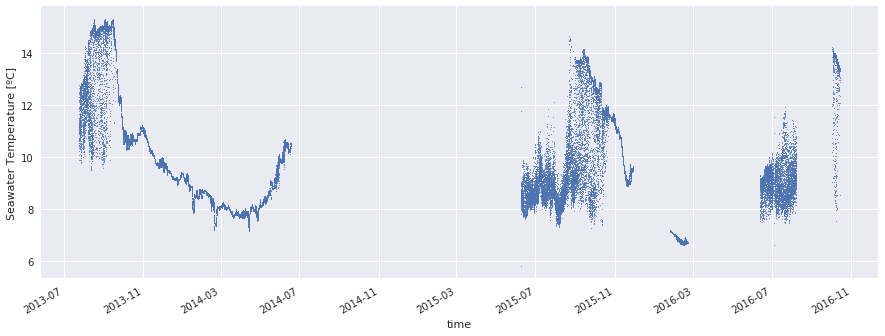

In [59]:
# plot raw temperature at Mooring B 30m
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDB['ctdmo_seawater_temperature'].plot(linestyle='none', marker='.', markersize=2);

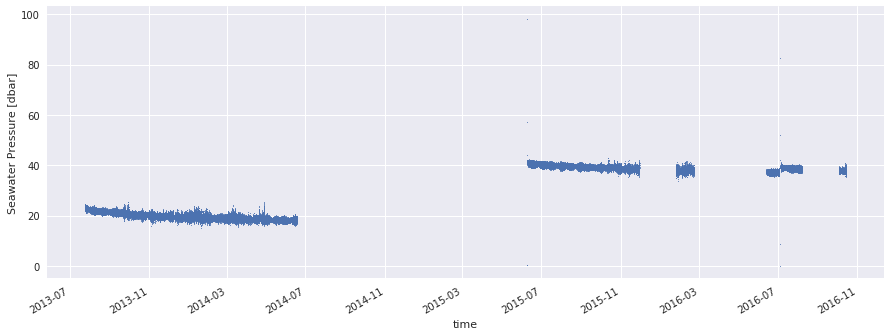

In [60]:
## plot raw pressure at Mooring B 30m
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDB['ctdmo_seawater_pressure'].plot(linestyle='none', marker='.', markersize=2);

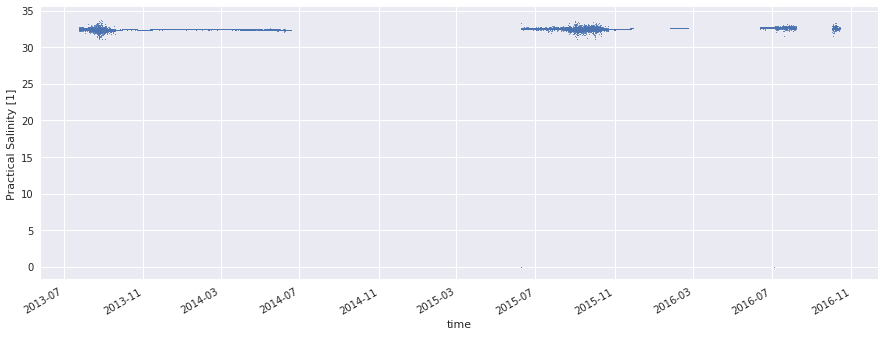

In [61]:
# plot raw salinity at Mooring B 30m
fig, (ax) = plt.subplots(figsize=(15,5))
ds_CTDB['practical_salinity'].plot(linestyle='none', marker='.', markersize=2);

In [62]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDBt = ds_CTDB['ctdmo_seawater_temperature'].to_dataframe()
    ds_CTDBt_a = ds_CTDBt.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
CPU times: user 1.05 s, sys: 246 ms, total: 1.29 s
Wall time: 1.33 s


In [63]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDBp = ds_CTDB['ctdmo_seawater_pressure'].to_dataframe()
    ds_CTDBp_a = ds_CTDBp.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.7s
CPU times: user 1.09 s, sys: 225 ms, total: 1.31 s
Wall time: 1.24 s


In [64]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_CTDBs = ds_CTDB['practical_salinity'].to_dataframe()
    ds_CTDBs_a = ds_CTDBs.resample('min').mean() # minute average

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.6s
CPU times: user 995 ms, sys: 195 ms, total: 1.19 s
Wall time: 1.2 s


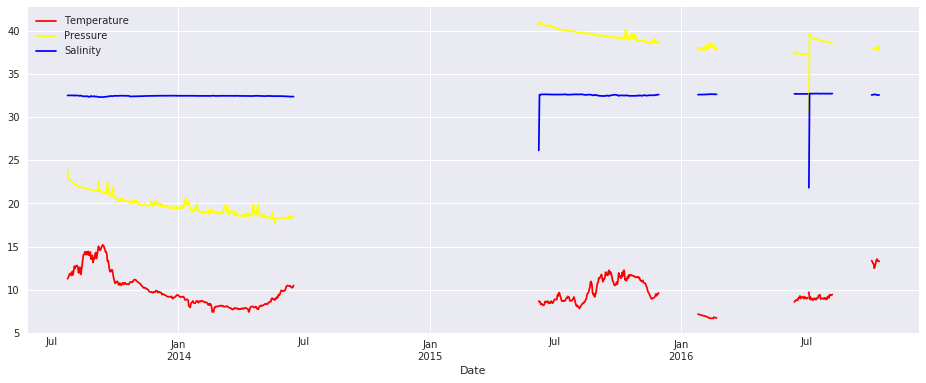

CPU times: user 597 ms, sys: 138 ms, total: 735 ms
Wall time: 530 ms


In [65]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
ds_CTDBt_a['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='Temperature')
ds_CTDBp_a['ctdmo_seawater_pressure'].resample('D').mean().plot(ax=ax, color='yellow', label='Pressure')
ds_CTDBs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', label='Salinity')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

Mooring B: 

CTD data during deployment 2 and part of deployment 3 & 4 are missing. For the rest, the changes in T, S & P showed in the figure seems normal, the abrupt changes (vertical lines) in S & P indicate the deployment of CTD.

Then, plot Temperature & Salinity from Mooring A & B together for comparison

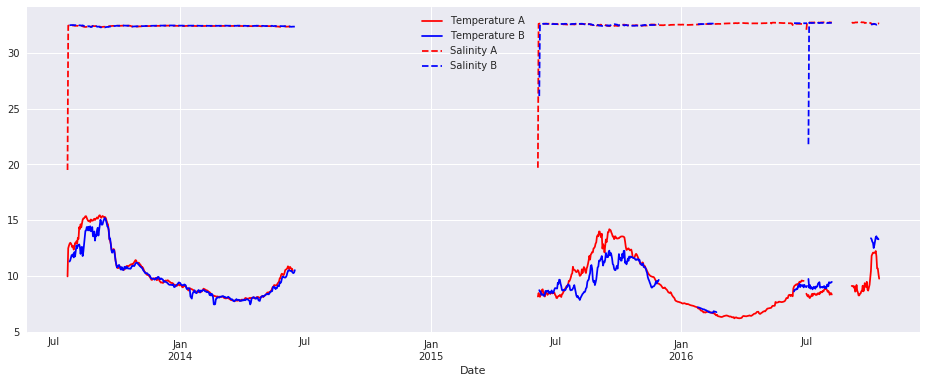

CPU times: user 551 ms, sys: 147 ms, total: 698 ms
Wall time: 493 ms


In [66]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_CTDAt_a['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='Temperature A')
ds_CTDBt_a['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='blue', label='Temperature B')
ds_CTDAs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
ds_CTDBs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

** The trends in temperatue & salinity daily averages are largely coonsistent between Mooring A & B (~40km apart), although large variations showed between Mooring A & B during July-Sep, 2015.**

Notes for CTD annotations at Mooring A & B

CTD at Mooring A:
- Deployment 2: Upon recovery of platform, biofouling was apparent on shallow CTDs (NO CTD data)
- Deployment 2: Upon recovery, a shield that guards the sensor and holds the anti-fouling was missing.

CTD at Mooring B:
- Deployment 2: Upon recovery of platform, biofouling was apparent on shallow CTDs.

## 5. A closer look

### 5a. check around deployment 3 & 4

Mooring A:

Stopdate of Deployment 3: 2016-06-28 19:10:00;   Stopdate of Deployment 4: 2016-07-01 01:07:00

Mooring B:

Stopdate of Deployment 3: 2016-07-03 18:35:00;   Stopdate of Deployment 4: 2016-07-04 23:07:00

Select data from 2016-06-27 to 2016_07_05 to check the DO, Temperature and Salinity during changeover of deployments from 3 to 4 

In [67]:
ds_DOA1_a_D34 = ds_DOA1_a.loc['20160627':'20160705']
ds_DOB1_a_D34 = ds_DOB1_a.loc['20160627':'20160705']
ds_CTDAt_a_D34 = ds_CTDAt_a.loc['20160627':'20160705']
ds_CTDBt_a_D34 = ds_CTDBt_a.loc['20160627':'20160705']
ds_CTDAs_a_D34 = ds_CTDAs_a.loc['20160627':'20160705']
ds_CTDBs_a_D34 = ds_CTDBs_a.loc['20160627':'20160705']

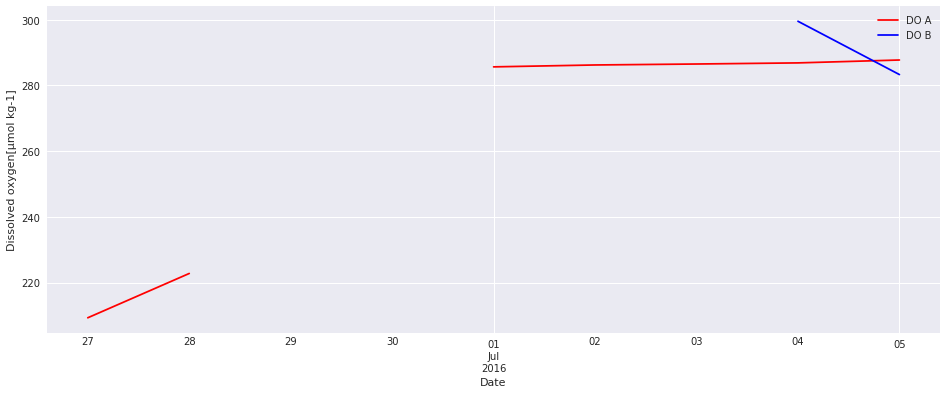

CPU times: user 379 ms, sys: 154 ms, total: 533 ms
Wall time: 336 ms


In [68]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_DOA1_a_D34['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='DO A')
ds_DOB1_a_D34['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='blue', label='DO B')
#ds_CTDAs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
#ds_CTDBs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

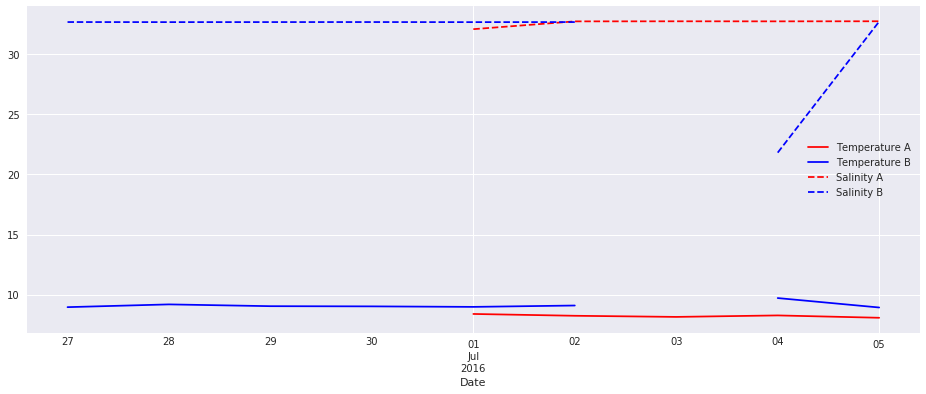

CPU times: user 421 ms, sys: 137 ms, total: 558 ms
Wall time: 356 ms


In [69]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_CTDAt_a_D34['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='Temperature A')
ds_CTDBt_a_D34['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='blue', label='Temperature B')
ds_CTDAs_a_D34['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
ds_CTDBs_a_D34['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

The temperature at mooring B seemes quite consistent during the changeover of deployment 3 & 4; the salinity at mooring B adjusted to over 30 psu within one day.
However, there's a jump in DO values (~60 umol/kg) from ~220 to ~285 umol/kg over the change of deployments.

### 5b. check around deployment 2 & 3

Mooring A:

Stopdate of Deployment 2: 2015-06-05 00:00:00;   Stopdate of Deployment 3: 2015-06-06 22:40:00

Mooring B:

Stopdate of Deployment 2: 2015-06-07 00:00:00;   Stopdate of Deployment 3: 2015-06-08 21:25:00

Select data from 2015-06-04 to 2015_06_09 to check the DO, Temperature and Salinity during changeover of deployments from 2 to 3 

In [70]:
ds_DOA1_a_D23 = ds_DOA1_a.loc['20150604':'20150609']
ds_DOB1_a_D23 = ds_DOB1_a.loc['20150604':'20150609']
ds_DOA2_a_D23 = ds_DOA2_a.loc['20150604':'20150609']
ds_DOB2_a_D23 = ds_DOB2_a.loc['20150604':'20150609']
ds_CTDAt_a_D23 = ds_CTDAt_a.loc['20150604':'20150609']
ds_CTDBt_a_D23 = ds_CTDBt_a.loc['20150604':'20150609']
ds_CTDAs_a_D23 = ds_CTDAs_a.loc['20150604':'20150609']
ds_CTDBs_a_D23 = ds_CTDBs_a.loc['20150604':'20150609']

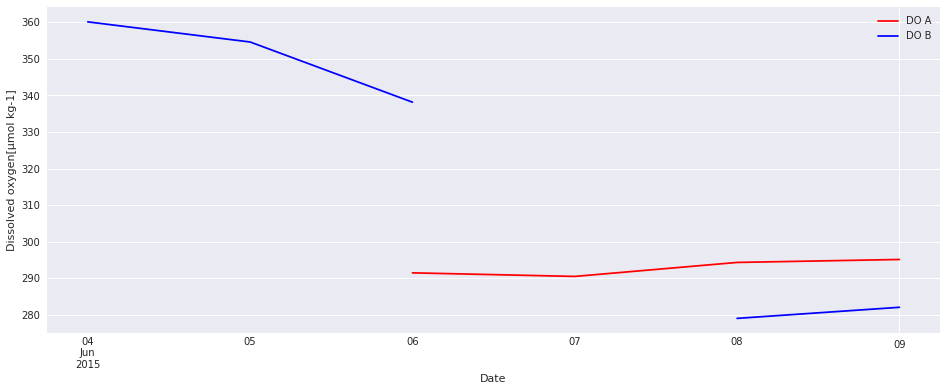

CPU times: user 394 ms, sys: 140 ms, total: 534 ms
Wall time: 324 ms


In [71]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_DOA1_a_D23['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='DO A')
ds_DOB1_a_D23['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='blue', label='DO B')
ds_DOA2_a_D23['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='_nolegend_')
ds_DOB2_a_D23['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='blue', label='_nolegend_')
#ds_CTDAs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
#ds_CTDBs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

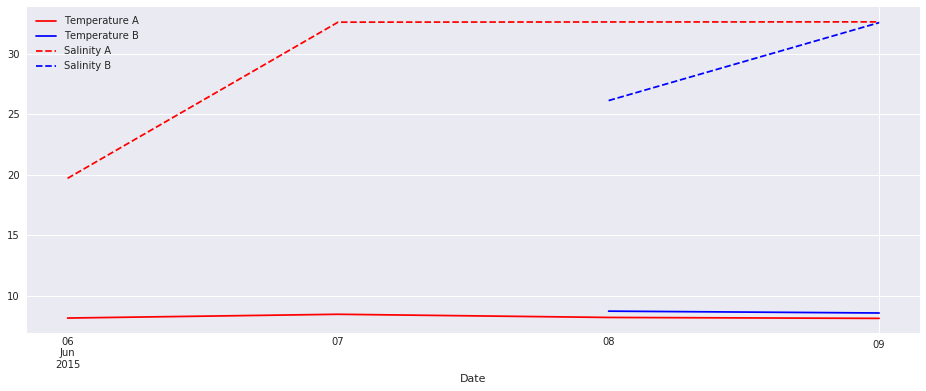

CPU times: user 380 ms, sys: 145 ms, total: 525 ms
Wall time: 336 ms


In [72]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_CTDAt_a_D23['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='Temperature A')
ds_CTDBt_a_D23['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='blue', label='Temperature B')
ds_CTDAs_a_D23['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
ds_CTDBs_a_D23['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

There's no CTD data available for deployment 2. The salinity measurements at both mooring A & B were adjusted over 30 psu within one day. 
While, the DO differences between deployments are large (~ 60umol/kg), suggesting the DO data from deployment 2 are probably not reliable.

### 5c. check the last one and half months of deployment 3

Select data from 2016-05-15 to 2016_07_01 to check the unusal changes in DO.
Also check the Temperature and Salinity during during the last one and half months of Deployment 3. 

In [73]:
ds_DOA1_a_D3 = ds_DOA1_a.loc['20160515':'20160701']
ds_DOB1_a_D3 = ds_DOB1_a.loc['20160515':'20160701']
ds_CTDAt_a_D3 = ds_CTDAt_a.loc['20160515':'20160701']
ds_CTDBt_a_D3 = ds_CTDBt_a.loc['20160515':'20160701']
ds_CTDAs_a_D3 = ds_CTDAs_a.loc['20160515':'20160701']
ds_CTDBs_a_D3 = ds_CTDBs_a.loc['20160515':'20160701']

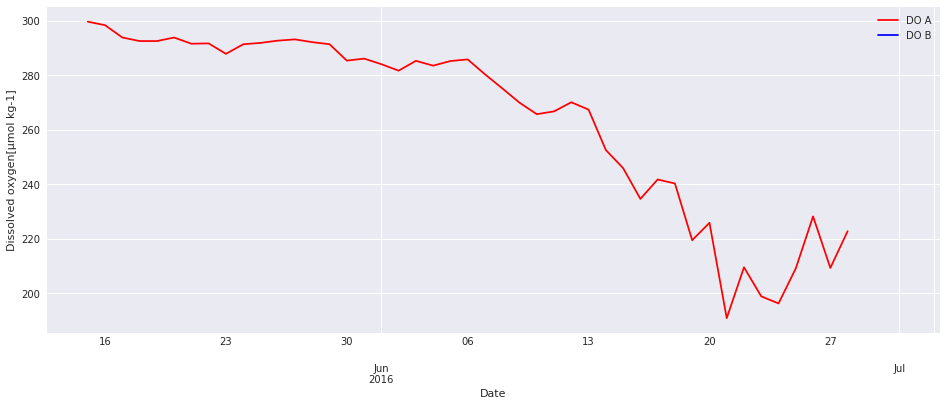

CPU times: user 521 ms, sys: 134 ms, total: 655 ms
Wall time: 454 ms


In [74]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_DOA1_a_D3['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='red', label='DO A')
ds_DOB1_a_D3['dissolved_oxygen'].resample('D').mean().plot(ax=ax, color='blue', label='DO B')
#ds_CTDAs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
#ds_CTDBs_a['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

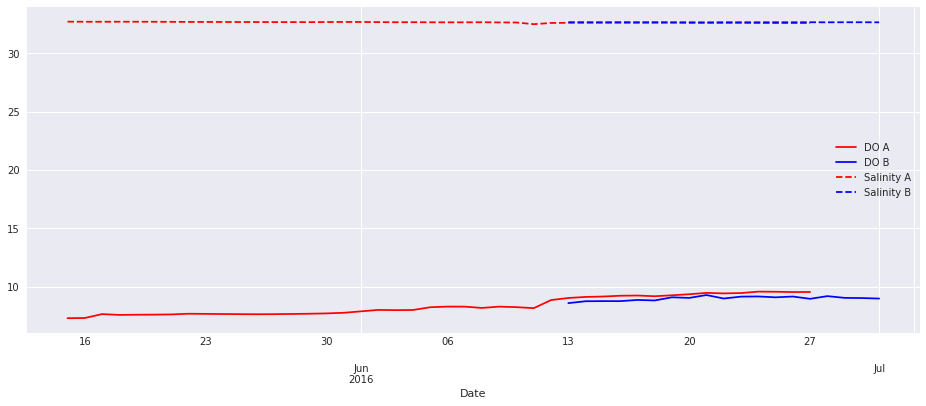

CPU times: user 537 ms, sys: 146 ms, total: 683 ms
Wall time: 489 ms


In [128]:
%%time
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#ds_DOA1_a['dissolved_oxygen'].plot(ax=ax)
#ds_DOA1_a['dissolved_oxygen'].resample('H').mean().plot(ax=ax) # hourly average
ds_CTDAt_a_D3['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='red', label='DO A')
ds_CTDBt_a_D3['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax, color='blue', label='DO B')
ds_CTDAs_a_D3['practical_salinity'].resample('D').mean().plot(ax=ax, color='red', linestyle='--',label='Salinity A')
ds_CTDBs_a_D3['practical_salinity'].resample('D').mean().plot(ax=ax, color='blue', linestyle='--',label='Salinity B')
plt.xlabel('Date')
#plt.ylabel('Dissolved oxygen[µmol kg-1]')
plt.legend()
plt.show()

During the last one and half month of deployment 3, the salinity measured at 30m of mooring A was quite consistent, while the temperature increase a bit gradually, considered as normal.
However, the DO measurement drift from 300 umol/kg down to 200 umol/kg within 35 days, suggesting likely the degragding of optodes.

## 7. Notable Results and Actions Needed


Based on this analysis of the DO measurements and CTD data at 30m from mooring A & B, we note the following takeaways:
* In terms of data availablibility, CTD data during deployment 2 are completely not available for both mooring A & B; DO measurements are partially available in deployment 2 & 4 at mooring A, and partially available in deployment 2, 3, & 4 at mooring B. 
* As CTD data, which will be used to correct the DO concentration, from deployment 2 are missing for both morring A & B, the DO measurements in deployment 2 from both mooring A & B are probbaly not reliable.
* The temperature and salinity data from CTD are good in general, showing resonable seasonal patterns in temperature and largely stable value in salinity.
* The DO concentration from the optodes are patially reliable:
  * DO concentration in deployment 1 (both A & B) are associated with high noise, probably due to bio-fouling, annotations about biofouling are already exist.
  * DO concentration by the end of deployment 2 (both A & B) are especially high, seems over the reasonable range showing from the other deployments, so should be checked.
  * DO concentration displayed an abrupt drop during the last 45 days of deployment 3 at mooring A, probably suggesting the optodes was not working appropriately.
* Although mooring A and B are around 40km apart, the trends and patterns in DO concentration, tempreature and salinity from both moorings are largely consistent. This consistency has been expected as mooring A & B are in offshore area.  
* Comparison between shipcoard measured (bottle samples) and optodes measured DO concentrations should be conducted when data are available. 